Let's take care of the fundamental first...

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

# Virtual Observatory

Astropy virtual observatory (`astropy.vo`) has a module called conesearch that lets you get all the targets in a cone centred in a given set of coordinates.
Let's import it and check the available catalogues:

In [2]:
from astropy.vo.client import conesearch

conesearch.list_catalogs()

['2MASS All-Sky Point Source Catalog 1',
 'Guide Star Catalog v2 1',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 1',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 2',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 3',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 4',
 'SDSS DR8 - Sloan Digital Sky Survey Data Release 8 1',
 'SDSS DR8 - Sloan Digital Sky Survey Data Release 8 2',
 'The HST Guide Star Catalog, Version 1.1 (Lasker+ 1992) 1',
 'The HST Guide Star Catalog, Version 1.2 (Lasker+ 1996) 1',
 'The HST Guide Star Catalog, Version GSC-ACT (Lasker+ 1996-99) 1',
 'The PMM USNO-A1.0 Catalogue (Monet 1997) 1',
 'The USNO-A2.0 Catalogue (Monet+ 1998) 1',
 'Two Micron All Sky Survey (2MASS) 1',
 'Two Micron All Sky Survey (2MASS) 2',
 'USNO-A2 Catalogue 1']

Now we need the coordinates of an object.
Why don't we start with [M67](https://en.wikipedia.org/wiki/Messier_67).
<img src='https://upload.wikimedia.org/wikipedia/commons/7/74/Messier_object_067.jpg'>


Don't worry if yopu don't remeber the coordinates of all the Messier object by heart (it's not like you are an astronomer after all); there's an helpful module that does just that: gives you the coordinates of objects in the sky!

In [3]:
from astropy.coordinates import SkyCoord
from astropy import units as u
c = SkyCoord.from_name('M67')
c.ra, c.dec

(<Longitude 132.825 deg>, <Latitude 11.8 deg>)

You don't like right angles in degrees? I know, they should be expressed in hours:

In [4]:
c.ra.to('hourangle')

<Longitude 8.855 hourangle>

Or for the math enthusiasts:

In [5]:
c.ra.to('rad').value # .value because radians are NOT a unit

2.318233578961468

Now, let's look on 2MASS and see what we can find at these coordinates.

In [7]:
result = conesearch.conesearch( c, 12* u.arcmin, catalog_db='2MASS All-Sky Point Source Catalog 1')

Trying http://irsa.ipac.caltech.edu/cgi-bin/Oasis/CatSearch/nph-catsearch?CAT=fp_psc&


In [8]:
result = result.to_table()
result[:8]

<Table masked=True length=8>
   ra     dec         err_maj        ... scan_key coadd_key coadd
  deg     deg                        ...                         
float64 float64       float64        ...  int32     int32   int32
------- ------- -------------------- ... -------- --------- -----
132.795  11.953  0.20000000000000001 ...     7578    174272     9
132.787  11.965 0.089999999999999997 ...     7578    174272     9
132.788  11.950 0.089999999999999997 ...     7578    174272     9
132.784  11.951  0.28999999999999998 ...     7578    174272     9
132.762  11.983 0.089999999999999997 ...     7578    174272     9
132.768  11.977  0.14000000000000001 ...     7578    174272     9
132.738  11.947 0.089999999999999997 ...     7578    174272     9
132.759  11.949  0.14000000000000001 ...     7578    174272     9

Data tables in astropy are implemented through the Table class

In [10]:
from astropy.table import Table

You can read (and save) tables easily in many common formats (ascii, fits, hdf5, csv, etc.)

In [11]:
help( Table.read )

Help on method read in module astropy.table.table:

read(*args, **kwargs) method of builtins.type instance
    Read and parse a data table and return as a Table.
    
    This function provides the Table interface to the astropy unified I/O
    layer.  This allows easily reading a file in many supported data formats
    using syntax such as::
    
      >>> from astropy.table import Table
      >>> dat = Table.read('table.dat', format='ascii')
      >>> events = Table.read('events.fits', format='fits')
    
    The arguments and keywords (other than ``format``) provided to this function are
    passed through to the underlying data reader (e.g. `~astropy.io.ascii.read`).
    
    The available built-in formats are:
    
    =========================== ==== ===== ============= ==========
               Format           Read Write Auto-identify Deprecated
    =========================== ==== ===== ============= ==========
                          ascii  Yes   Yes            No          

Let's try to load the data we just downloaded

In [28]:
result = Table.read( 'https://people.lam.fr/bonamigo.mario/hackinghour/M67.dat', format='ascii.commented_header' )
result[:8]

<Table length=8>
   ra     dec   err_maj err_min err_ang ... ext_key scan_key coadd_key coadd
float64 float64 float64 float64  int64  ...   str7   int64     int64   int64
------- ------- ------- ------- ------- ... ------- -------- --------- -----
132.795  11.953     0.2    0.19     114 ...      --     7578    174272     9
132.787  11.965    0.09    0.06       0 ...      --     7578    174272     9
132.788   11.95    0.09    0.06       0 ...      --     7578    174272     9
132.784  11.951    0.29    0.26     177 ...      --     7578    174272     9
132.762  11.983    0.09    0.06       0 ...      --     7578    174272     9
132.768  11.977    0.14    0.11       3 ...      --     7578    174272     9
132.738  11.947    0.09    0.06       0 ...      --     7578    174272     9
132.759  11.949    0.14    0.12       5 ...      --     7578    174272     9

You can even save in $\LaTeX$ (yes, you can have latex command here)

In [13]:
result[ [ 'designation', 'ra', 'dec' ] ][:8].write( 'M67.tex' )

! cat M67.tex

\begin{table}
\begin{tabular}{ccc}
designation & ra & dec \\
b'08511082+1157102' & 132.795 & 11.953 \\
b'08510885+1157537' & 132.787 & 11.965 \\
b'08510914+1157003' & 132.788 & 11.95 \\
b'08510820+1157037' & 132.784 & 11.951 \\
b'08510286+1158580' & 132.762 & 11.983 \\
b'08510430+1158360' & 132.768 & 11.977 \\
b'08505706+1156507' & 132.738 & 11.947 \\
b'08510216+1156554' & 132.759 & 11.949 \\
\end{tabular}
\end{table}


Let's get back to our open cluster.

Who's up for a H-R diagram?

<IPython.core.display.Javascript object>


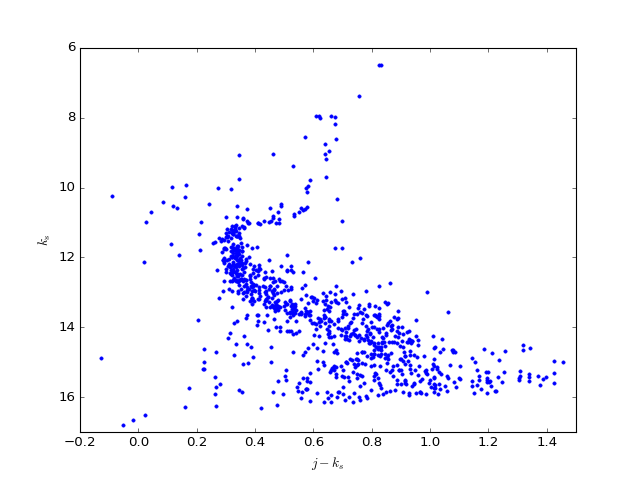

In [14]:
color = result['j_m'] - result['k_m']

plt.close('all')
plt.plot(  color, result['k_m'], '.' )
plt.axis( ( -0.2, 1.5, 17, 6 ) )
plt.xlabel( '$j - k_s$' )
plt.ylabel( '$k_s$' )

A little bit fancier:

<IPython.core.display.Javascript object>


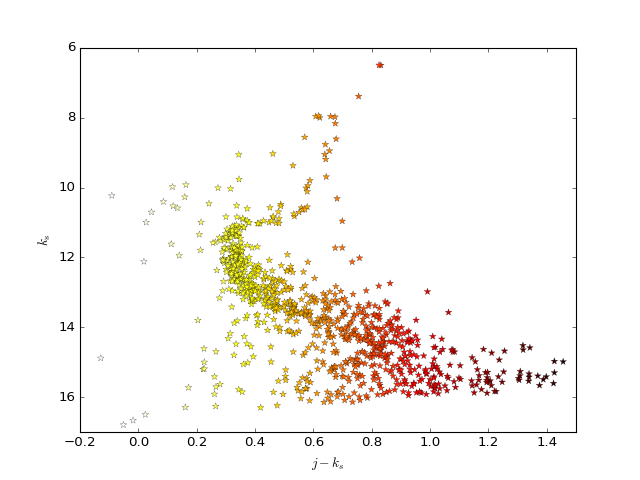

In [15]:
color = result['j_m'] - result['k_m']

plt.close('all')
plt.scatter( color, result['k_m'], c=color, vmin=0., vmax=1.5,
             marker='*', s=40, linewidths=0.2, cmap='hot_r' )
plt.axis( ( -0.2, 1.5, 17, 6 ) )
plt.xlabel( '$j - k_s$' )
plt.ylabel( '$k_s$' )

# Cosmology

Why don't we move outside this galaxy?

In [16]:
c = SkyCoord.from_name('Coma')
c.ra, c.dec

(<Longitude 194.95292 deg>, <Latitude 27.98056 deg>)

In [17]:
%%time
result = conesearch.conesearch( c, 20 * u.arcmin, catalog_db='SDSS DR8 - Sloan Digital Sky Survey Data Release 8 2')

Trying http://wfaudata.roe.ac.uk/sdssdr8-dsa/DirectCone?DSACAT=SDSS_DR8&DSATAB=SpecObjAll&


CPU times: user 39.2 s, sys: 585 ms, total: 39.8 s
Wall time: 1min 12s


You know the drill...

In [27]:
result = Table.read( "https://people.lam.fr/bonamigo.mario/hackinghour/coma.fits" )

<IPython.core.display.Javascript object>


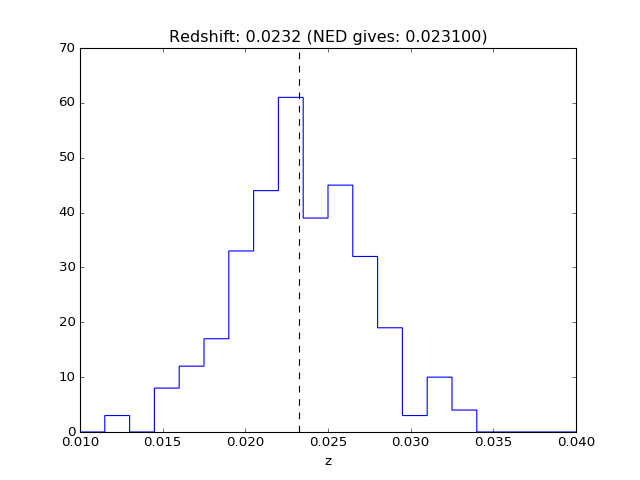

In [20]:
plt.close('all')

z = result['z']
zlim = ( 0.01, 0.04 )
zmask = (z > zlim[0]) & (z < zlim[1])
zmed = np.median( z[ zmask ] )

plt.hist( z, bins=20, range=zlim, histtype='step' )
plt.axvline( zmed, color='k', ls='dashed' )
plt.xlabel( 'z' )
plt.title( "Redshift: {0:.4f} (NED gives: 0.023100)".format( zmed ) )

We can use the cosmoloy module to convert this to comoving distance:

In [21]:
from astropy.cosmology import Planck15 as cosmo
cosmo.comoving_distance( zmed )

<Quantity 102.32094101517009 Mpc>

Or if you like your are not sure which cosmology to choose...

<IPython.core.display.Javascript object>


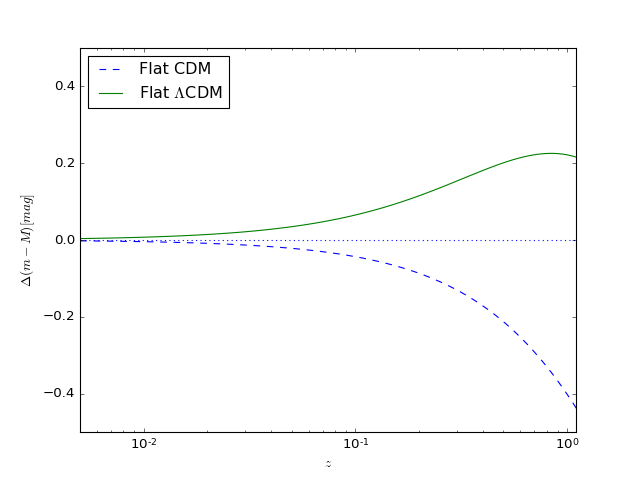

In [22]:
from astropy.cosmology import LambdaCDM, FlatLambdaCDM
plt.figure()

cflat = LambdaCDM( H0 = 70., Om0=1., Ode0=0. )
copen = LambdaCDM( H0 = 70., Om0=0.2, Ode0=0. )
clambda = FlatLambdaCDM( H0 = 70., Om0=0.28 )

zz = np.logspace( -2.3, 0.1, 100 )
plt.plot( zz, cflat.distmod(zz) - copen.distmod(zz) , '--', label='Flat CDM')
plt.plot( zz, clambda.distmod(zz) - copen.distmod(zz) , '-', label='Flat $\Lambda$CDM' )
plt.axhline( 0., ls='dotted' )

plt.axis( (0.005, 1.1, -0.5, 0.5 ) )
plt.semilogx()
plt.legend( loc=2 )
plt.xlabel( '$z$' )
plt.ylabel( '$\Delta (m - M) [mag]$')

Let's do something fun with these redshifts.

In [23]:
import astropy.constants as cn
vdisp = np.std( z[zmask] - zmed ) * cn.c / ( 1 + zmed )

np.sqrt( np.mean( vdisp.to('km/s')**2 ) )

<Quantity 1139.4795106359024 km / s>

In [24]:
(3 * 2*10**6 * u.lyr * np.median( vdisp**2 ) / 5 / cn.G).to('solMass').cgs

<Quantity 2.2087327273003356e+47 g>

<img src='https://people.lam.fr/bonamigo.mario/hackinghour/zwicky.png'>
